# Handling missing values

### various techniques for Handling missing values
    1.mean,median,mode replacement
    2.Random sample Imputation
    3.Capturing NaN values with a new features
    4.End of Distribution Imputation
    5.Arbitrary Imputation
    6.Frequent categories Imputation
    7.missing value spacify as a category 

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
train.groupby(["Survived"])["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### 1. mean,median,mode replacement 
     Aim:use statistics central tendency (mean,mode median) to replace nan values in dataset. 

In [6]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
def handl_miss_values(df,col,values):
    df[col+"_median"]=df["Age"].fillna(values)

In [8]:
median = df["Age"].median()

In [9]:
handl_miss_values(df,"Age",median)

In [10]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [11]:
print(df["Age"].std())
print(df["Age_median"].std())

14.526497332334042
13.019696550973201


#### visualize variance difference between Age and Age_median

In [12]:
import matplotlib.pyplot as plt

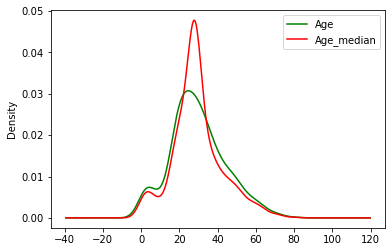

In [13]:
ax = plt.subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="green")
df["Age_median"].plot(kind="kde",ax=ax,color="red")
plt.legend(["Age","Age_median"])
plt.show()

## 2.Random sample Imputation
   Aim:Random sample imputation consist of taking random values from dataset and we use that value to
        replace nan values

In [14]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [16]:
def handl_miss_values(df,col,values):
    df[col+"_median"]=df[col].fillna(values)
    df[col+"_random"]=df[col]
    random_sample=df[col].dropna().sample(df[col].isnull().sum(),random_state=5)
    random_sample.index = df[df[col].isnull()].index
    df.loc[df[col].isnull(),col+"_random"]=random_sample

In [17]:
median = df["Age"].median()

In [18]:
handl_miss_values(df,"Age",median)

In [19]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [20]:
print(df["Age"].std())
print(df["Age_median"].std())
print(df["Age_random"].std())

14.526497332334042
13.019696550973201
14.44524423680844


#### visualize variance difference between Age and Age_median and Age_random

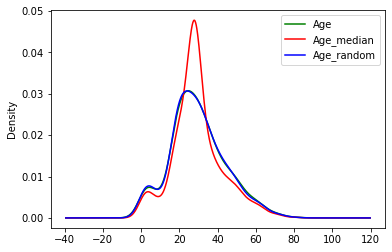

In [21]:
ax = plt.subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="green")
df["Age_median"].plot(kind="kde",ax=ax,color="red")
df["Age_random"].plot(kind="kde",ax=ax,color="blue")
plt.legend(["Age","Age_median","Age_random"])
plt.show()

## 3. Capturing NaN values with a new features
      Aim:Capturing new feature in dataset feature that have nan values

In [22]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
def handl_miss_values(df,col,values):
    df[col+"_median"]=df["Age"].fillna(values)

In [24]:
# here i can any use like-mean,mode,median and Random sample 
median = df["Age"].median()

In [25]:
handl_miss_values(df,"Age",median)

In [26]:
df["Age_isnan"] = np.where(df["Age"].isnull(),1,0)

In [27]:
df.head()

,Survived,Age,Fare,Age_median,Age_isnan
0,0,22.0,7.2500,22.0,0
1,1,38.0,71.2833,38.0,0
2,1,26.0,7.9250,26.0,0
3,1,35.0,53.1000,35.0,0
4,0,35.0,8.0500,35.0,0


## End of Distribution Imputation
    Aim:In this scenario, one would want to replace missing data with values that are at the tails
       of the distribution of the variable

In [28]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


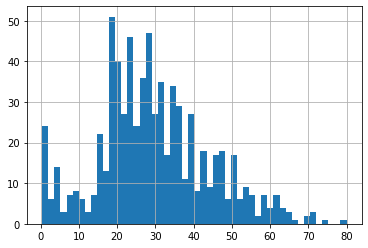

In [29]:
df["Age"].hist(bins=50)

In [30]:
extreme = df["Age"].mean()+(3*df["Age"].std())
extreme

73.27860964406094

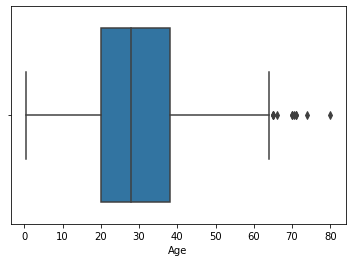

In [31]:
import seaborn as sns
sns.boxplot("Age",data=df)

In [32]:
def impute_nan(df,col,median,extreme):
    df[col+"_end_dis"]=df[col].fillna(extreme)
    df[col]=df[col].fillna(median)

In [33]:
median = df["Age"].median()

In [34]:
impute_nan(df,"Age",median,extreme)

In [35]:
df.head()

,Survived,Age,Fare,Age_end_dis
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


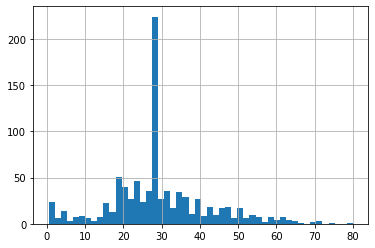

In [36]:
df["Age"].hist(bins=50)

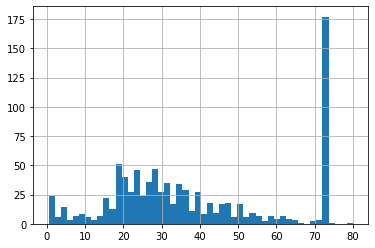

In [37]:
df["Age_end_dis"].hist(bins=50)

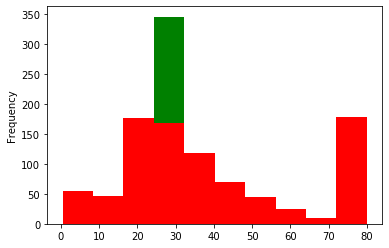

In [38]:
ax = plt.subplot(111)
df["Age"].plot(kind="hist",ax=ax,color="green")
df["Age_end_dis"].plot(kind="hist",ax=ax,color="red")
plt.show()

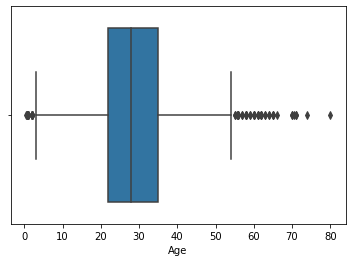

In [39]:
sns.boxplot("Age",data=df)

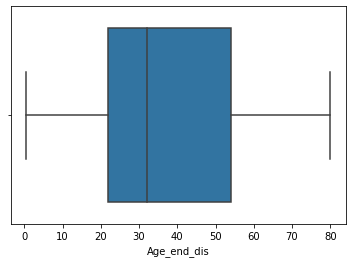

In [40]:
sns.boxplot("Age_end_dis",data=df)

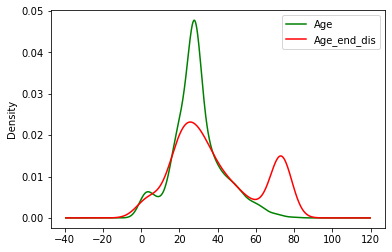

In [41]:
ax = plt.subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="green")
df["Age_end_dis"].plot(kind="kde",ax=ax,color="red")
plt.legend(["Age","Age_end_dis"])
plt.show()

## Arbitrary vlue Imputation
 - Aim:it consists of replacing NAN value by an arbitrary vlue

In [42]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
def nan_to_Arbitrary():
    df["Age_zero"]=df["Age"].fillna(0)
    df["Age_hun"]=df["Age"].fillna(100)    

In [44]:
nan_to_Arbitrary()

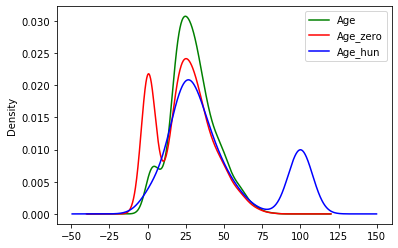

In [45]:
ax = plt.subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="green")
df["Age_zero"].plot(kind="kde",ax=ax,color="red")
df["Age_hun"].plot(kind="kde",ax=ax,color="blue")
plt.legend(["Age","Age_zero","Age_hun"])
plt.show()

# Handle categorical missing values


### Frequent Category Imputation

In [46]:
df = pd.read_csv("house_train.csv",usecols=["FireplaceQu",'GarageCond',"SalePrice"])
df

,FireplaceQu,GarageCond,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [47]:
df.isnull().sum()

FireplaceQu    690
GarageCond      81
SalePrice        0
dtype: int64

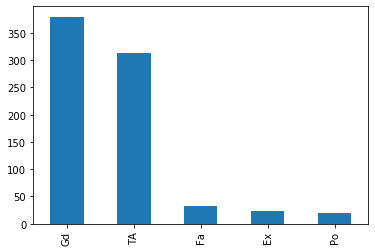

In [48]:
df["FireplaceQu"].value_counts().plot(kind="bar")       

In [49]:
df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [50]:
def impute_nan(df,col):
    frequent_category = df[col].mode()[0]
    df[col]=df[col].fillna(frequent_category)

In [51]:
impute_nan(df,"GarageCond")
impute_nan(df,"FireplaceQu")

In [52]:
df.isnull().sum()

FireplaceQu    0
GarageCond     0
SalePrice      0
dtype: int64

### missing value spacify as a category 

In [53]:
df = pd.read_csv("house_train.csv",usecols=["FireplaceQu",'GarageCond',"SalePrice"])
df

,FireplaceQu,GarageCond,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [54]:
def impute_nan(df,col):
    df[col]=np.where(df[col].isnull(),"missing",df[col])

In [55]:
impute_nan(df,"FireplaceQu")
impute_nan(df,"GarageCond")

In [56]:
df.head()

,FireplaceQu,GarageCond,SalePrice
0,missing,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


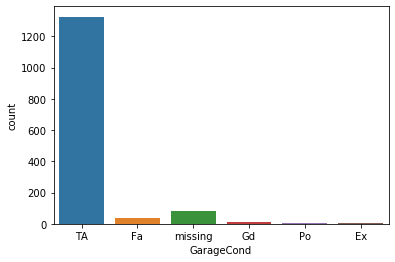

In [57]:
import seaborn as sns
sns.countplot("GarageCond",data=df)

## Knn-Imputation

In [58]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
df.drop(["PassengerId","Name","Ticket","Sex","Embarked"],axis=1,inplace=True)

In [60]:
train = df[["Survived","Pclass","SibSp","Parch","Fare","Age"]]

In [61]:
from sklearn.impute import KNNImputer

In [62]:
knnimpute = KNNImputer()
knnimpute.fit(np.array(train["Age"]).reshape(-1,1))

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [63]:
age = knnimpute.transform(np.array(train["Age"]).reshape(-1,1))

In [64]:
age

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

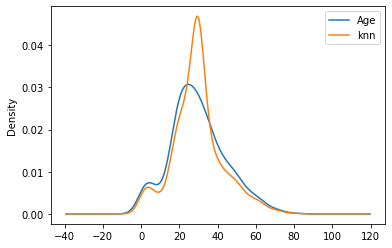

In [65]:
plt.subplot(111)
train["Age"].plot(kind="kde")
pd.Series(age.ravel()).plot(kind="kde")
plt.legend(["Age","knn"])